<a href="https://colab.research.google.com/github/mmuucha/ML-01/blob/main/Loan_Prediction_classification_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt


In [6]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [7]:
# load csv file
data = pd.read_csv('revised_loan_default_dataset.csv')

In [8]:
# Check for null data
nums = data.columns[data.dtypes != 'object']
vars = data.columns[data.dtypes == 'object']
data[nums].isnull().sum()

,0
Income,49944
LoanAmount,49948
CreditScore,50022
Age,49850
LoanDuration,50097
LoanDefault,0


In [9]:
# handle numeric columns
numeric_data = data.select_dtypes(include=['number'])
median_values = numeric_data.median()
data.fillna(median_values, inplace=True)
print(data.isnull().sum())


Date                   0
Income                 0
LoanAmount             0
CreditScore            0
Age                    0
LoanDuration           0
EmploymentStatus    9952
MaritalStatus       9879
EducationLevel      9935
LoanDefault            0
dtype: int64


In [10]:
# handle string columns
for column in data.select_dtypes(include=['object']).columns:
  mode_value = data[column].mode()[0] # most frequent value
  data[column].fillna(mode_value, inplace=True)

print(data.isnull().sum())


Date                0
Income              0
LoanAmount          0
CreditScore         0
Age                 0
LoanDuration        0
EmploymentStatus    0
MaritalStatus       0
EducationLevel      0
LoanDefault         0
dtype: int64


In [26]:
# Preprocess data
X = data.drop('LoanDefault', axis=1,errors='ignore')
y = data['LoanDefault'] if 'LoanDefault' in data.columns else None

if y is None:
    raise ValueError("Target variable 'LoanDefault' is missing from the DataFrame")

In [13]:
# Create a preprocessing pipeline
numerical_features = ['Income', 'LoanAmount', 'CreditScore', 'Age', 'LoanDuration']
categorical_features = ['Date', 'EmploymentStatus', 'MaritalStatus', 'EducationLevel']

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [54]:
# splitting into data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Fit the preprocessor on the training data and transform it
X_train_processed = preprocessor.fit_transform(X_train)


In [58]:
# model creation
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

model_1.fit(X_train_processed, y_train, epochs=1, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 102s 50ms/step - accuracy: 0.8988 - loss: 0.3457 - val_accuracy: 0.8984 - val_loss: 0.3318


In [59]:
# evaluation
X_test_processed = preprocessor.transform(X_test)
model_1.evaluate(X_test_processed, y_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8982 - loss: 0.3320


[0.3270006775856018, 0.9006999731063843]

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step


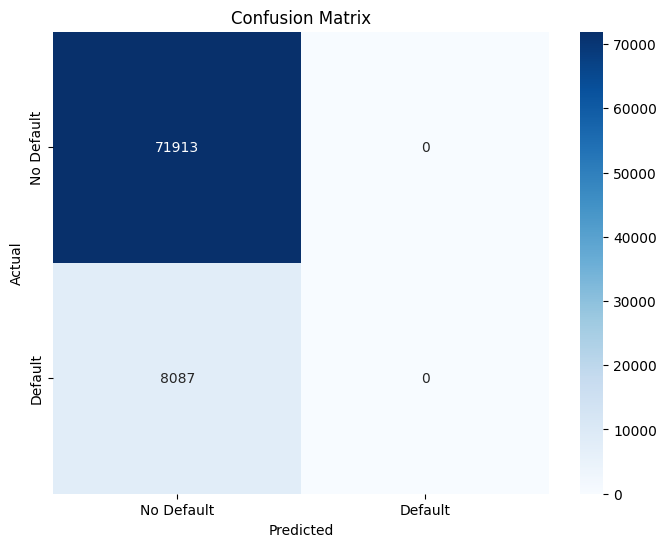

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on your training set or validation set
y_pred = model_1.predict(X_train_processed)
y_pred_classes = (y_pred > 0.5).astype(int)  # Binarize predictions

# Create confusion matrix
cm = confusion_matrix(y_train, y_pred_classes)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
